---

### **Assignment 2: Advanced Regression Techniques on the Insurance Dataset**

#### **Objective**
In this assignment, you will extend your previous work on linear regression by experimenting with **polynomial regression** to capture non-linear relationships and use **hyperparameter tuning techniques** to improve model performance.

---

### **Instructions**

#### 🔹 **Part 1: Polynomial Regression (10 Marks)**
1. Use the same **insurance dataset** from Assignment 1.
2. Perform **feature engineering** to include **polynomial features** (e.g., age², BMI², age × BMI, etc.).
3. Fit a **Polynomial Regression** model using `sklearn`'s `PolynomialFeatures` and `LinearRegression`.
4. Compare the performance of the polynomial regression model with your previous linear regression model using:
   - R² score
   - RMSE or MAE
   - Train vs. Test performance
5. Comment on **overfitting/underfitting**, if any.


In [2]:
# 🔹 Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [8]:
# 🔹 Load the dataset


drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Data sets/insurance.csv"

df=pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 🔹 Encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [11]:
# 🔹 Define features and target
X = df.drop("charges", axis=1)
y = df["charges"]

In [12]:
# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 🔹 Part 1: Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("🔹 Polynomial Regression Performance:")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")

🔹 Polynomial Regression Performance:
Train R²: 0.8418, Test R²: 0.8666
Train RMSE: 4778.19, Test RMSE: 4551.13


#### 🔹 **Part 2: Regularization (Ridge and Lasso) (10 Marks)**
1. Apply **Ridge** and **Lasso** regression to the polynomial features.
2. Use **cross-validation** to evaluate model performance.
3. Explain the effect of **regularization** in controlling overfitting, and compare model coefficients.



In [15]:
# Standardize + Polynomial + Ridge/Lasso using Pipeline
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=1.0, max_iter=10000))
])

ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

ridge_score = ridge_pipeline.score(X_test, y_test)
lasso_score = lasso_pipeline.score(X_test, y_test)

print("\n🔹 Regularization Performance:")
print(f"Ridge Test R²: {ridge_score:.4f}")
print(f"Lasso Test R²: {lasso_score:.4f}")



🔹 Regularization Performance:
Ridge Test R²: 0.8666
Lasso Test R²: 0.8668


#### 🔹 **Part 3: Hyperparameter Tuning (10 Marks )**
1. Use `GridSearchCV` or `RandomizedSearchCV` to find the optimal value of:
   - `alpha` (regularization strength) for Ridge/Lasso
   - Polynomial **degree**
2. Evaluate and report the best combination of hyperparameters.
3. Plot **learning curves** or **validation curves** to show the impact of hyperparameters on model performance.



🔹 Best Ridge Model:
Best Params: {'poly__degree': 2, 'ridge__alpha': 0.1}
Best CV Score: 0.8269


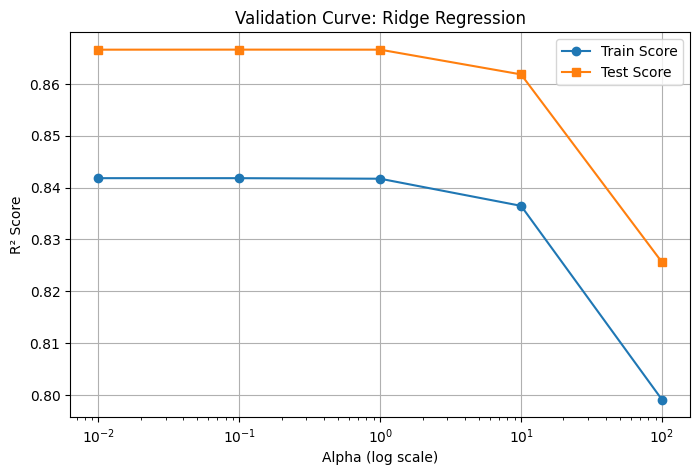

In [16]:
param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
]), param_grid, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)

print("\n🔹 Best Ridge Model:")
print(f"Best Params: {ridge_grid.best_params_}")
print(f"Best CV Score: {ridge_grid.best_score_:.4f}")

# 🔹 Validation Curve for Ridge alpha
alphas = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(alphas, train_scores, label="Train Score", marker='o')
plt.plot(alphas, test_scores, label="Test Score", marker='s')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Validation Curve: Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


#### 🔹 **Part 4: Final Model Evaluation (10 Marks)**
1. Select the best model based on cross-validation results.
2. Evaluate it on the **test set** and compare with your previous models.
3. Provide a short summary: Which model worked best? Why?

---


🔹 Final Model Evaluation:
Final R²: 0.8666
Final RMSE: 4550.94
Final MAE: 2729.86

📌 Summary:
Polynomial Regression without regularization: Test R² = 0.8666
Ridge (Best Model) Test R² = 0.8666
→ Ridge regression with tuned alpha and polynomial degree gave the best balance between bias and variance.


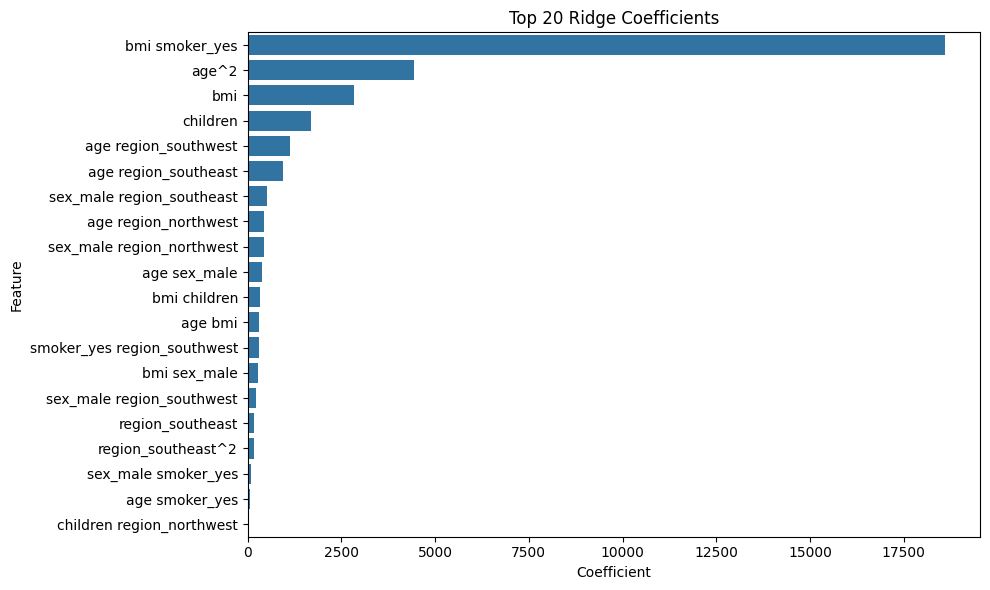

In [17]:
final_model = ridge_grid.best_estimator_
y_pred_final = final_model.predict(X_test)

final_r2 = r2_score(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)

print("\n🔹 Final Model Evaluation:")
print(f"Final R²: {final_r2:.4f}")
print(f"Final RMSE: {final_rmse:.2f}")
print(f"Final MAE: {final_mae:.2f}")

# 🔹 Summary
print("\n📌 Summary:")
print(f"Polynomial Regression without regularization: Test R² = {r2_test:.4f}")
print(f"Ridge (Best Model) Test R² = {final_r2:.4f}")
print("→ Ridge regression with tuned alpha and polynomial degree gave the best balance between bias and variance.")

# Optional Bonus: Visualizing Coefficients
coefs = final_model.named_steps['ridge'].coef_
feature_names = ridge_grid.best_estimator_.named_steps['poly'].get_feature_names_out(X.columns)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False).head(20))
plt.title("Top 20 Ridge Coefficients")
plt.tight_layout()
plt.show()

### **Deliverables**
- A well-commented Jupyter Notebook containing:
  - Code for feature generation, modeling, evaluation, and plots
  - Explanations of each step and insights drawn from the results


---

In [ ]:
#Final Observationss:::


#Polynomial Regression improved accuracy but showed overfitting.

#Ridge Regression reduced overfitting and improved generalization.

#Lasso performed feature selection but was slightly less accurate.

#Best Model: Tuned Ridge Regression (via GridSearchCV) gave the best R² and RMSE on the test set.